In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir('/content/drive/My Drive/Colab_Notebooks/DeepLearning_Baharan/Session_05')

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
tf.__version__

'2.1.0-rc1'

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils, layers, models, optimizers, losses

In [0]:
n_classes = 10
batch_size = 32

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 784)).astype(np.float32) / 255.
x_test = x_test.reshape((-1, 784)).astype(np.float32) / 255. 

# y_train = utils.to_categorical(y_train, num_classes=n_classes)
# y_test = utils.to_categorical(y_test, num_classes=n_classes)
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)
print("x_test.shape: ", x_test.shape)
print("y_test.shape: ", y_test.shape)

x_train.shape:  (60000, 784)
y_train.shape:  (60000,)
x_test.shape:  (10000, 784)
y_test.shape:  (10000,)


In [0]:
inputs = layers.Input(shape=784, name='inputs' )
x = inputs
x = layers.Dense(units=256, name='my_dense_1')(x)
x = layers.LeakyReLU(0.4)(x)
x = layers.Dense(units=256, name='my_dense_2')(x)
x = layers.Activation('relu')(x)
outputs = layers.Dense(units=n_classes, activation='softmax', name='output')(x)

In [0]:
model = models.Model(inputs=inputs, outputs= outputs)

In [0]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
my_dense_1 (Dense)           (None, 256)               200960    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
my_dense_2 (Dense)           (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_____________________________________________________

In [0]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

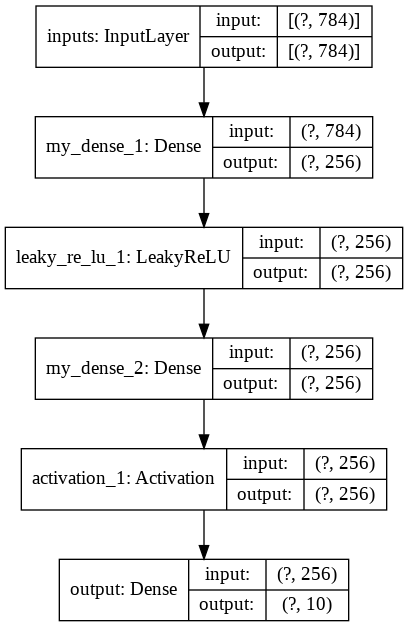

In [0]:
utils.plot_model(model, to_file='mnist_fc_model.png', show_shapes=True)

In [0]:
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.4341 - accuracy: 0.8849 - val_loss: 0.2337 - val_accuracy: 0.9326
Epoch 2/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2126 - accuracy: 0.9395 - val_loss: 0.1779 - val_accuracy: 0.9467
Epoch 3/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1644 - accuracy: 0.9532 - val_loss: 0.1475 - val_accuracy: 0.9562
Epoch 4/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1342 - accuracy: 0.9612 - val_loss: 0.1250 - val_accuracy: 0.9638
Epoch 5/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1125 - accuracy: 0.9676 - val_loss: 0.1141 - val_accuracy: 0.9648


In [0]:
weights = model.get_weights()

In [0]:
len(weights)

6

In [0]:
for weight in weights:
    print(weight.shape)

(784, 256)
(256,)
(256, 256)
(256,)
(256, 10)
(10,)


In [0]:
for layer in model.layers:
    print(layer.name)


inputs
my_dense_1
my_dense_2
output


In [0]:
idx = 56
sample = x_test[idx]
label = np.argmax(y_test[idx])

(<matplotlib.image.AxesImage at 0x7fec9a0eb2e8>, 4)

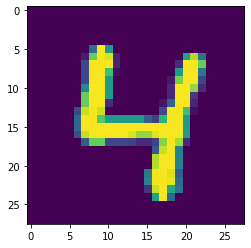

In [0]:
plt.imshow(x_test[idx].reshape(28,28)), label

In [0]:
sample = x_test[idx]
sample = np.expand_dims(sample, axis=0)
print(sample.shape)
np.argmax(model.predict(sample), axis=1)

(1, 784)


array([4])

In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 60us/sample - loss: 0.0743 - accuracy: 0.9788


[0.07434016635056469, 0.9788]

In [0]:
history = model.history.history

In [0]:
len(history['accuracy'])

5

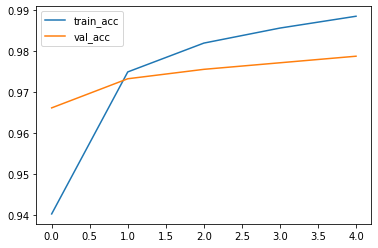

In [0]:
plt.plot(history['accuracy'], label='train_acc')
plt.plot(history['val_accuracy'], label='val_acc')
plt.legend()

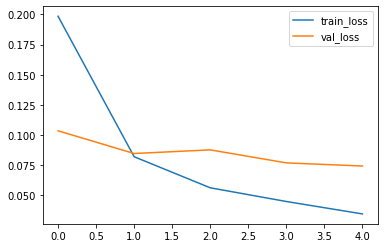

In [0]:
plt.plot(history['loss'], label='train_loss')
plt.plot(history['val_loss'], label='val_loss')
plt.legend()

In [0]:
model.save('mnist_fc_model.h5')

In [0]:
model = models.load_model('mnist_fc_model.h5')

In [0]:
model.save_weights()
model.load_weights()